<a href="https://colab.research.google.com/github/Sachin-D-N/Amazon_Food_Reviews/blob/main/05.Logistic_Regression_Amazon_Food_Reviews/Logistic_Regression_Amazon_Food_Reviews_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Fine Food Reviews Analysis


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews <br>

EDA: https://nycdatascience.com/blog/student-works/amazon-fine-foods-visualization/


The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given a review, determine whether the review is positive (rating of 4 or 5) or negative (rating of 1 or 2).

<br>
[Q] How to determine if a review is positive or negative?<br>
<br> 
[Ans] We could use Score/Rating. A rating of 4 or 5 can be cosnidered as a positive review. A rating of 1 or 2 can be considered as negative one. A review of rating 3 is considered nuetral and such reviews are ignored from our analysis. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.




# Assignment : Apply Logistic Regression

<ol>
    <li><strong>Apply Logistic Regression on these feature sets</strong>
        <ul>
            <li><font color='red'>SET 1:</font>Review text, preprocessed one converted into vectors using (BOW)</li>
            <li><font color='red'>SET 2:</font>Review text, preprocessed one converted into vectors using (TFIDF)</li>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Pertubation Test</strong>
        <ul>
    <li>Get the weights W after fit your model with the data X i.e Train data.</li>
    <li>Add a noise to the X (X' = X + e) and get the new data set X' (if X is a sparse
matrix, X.data+=e)</li>
    <li>Fit the model again on data X' and get the weights W'</li>
    <li>Add a small eps value(to eliminate the divisible by zero error) to W and W’ i.e
W=W+10^-6 and W’ = W’+10^-6</li>
    <li>Now find the % change between W and W' (| (W-W') / (W) |)*100)</li>
    <li>Calculate the 0th, 10th, 20th, 30th, ...100th percentiles, and observe any sudden rise in the values of percentage_change_vector</li>
    <li> Ex: consider your 99th percentile is 1.3 and your 100th percentiles are 34.6, there is sudden rise from 1.3 to 34.6, now calculate the 99.1, 99.2, 99.3,..., 100th percentile values and get the proper value after which there is sudden rise the values, assume it is 2.5</li>
            <li> Print the feature names whose % change is more than a threshold x(in our example it's 2.5)</li>
        </ul>
    </li>
    <br>
    <li><strong>Sparsity</strong>
        <ul>
    <li>Calculate sparsity on weight vector obtained after using L1 regularization</li>
        </ul>
    </li>
    <br><font color='red'>NOTE: Do sparsity and multicollinearity for any one of the vectorizers. Bow or tf-idf is recommended.</font>
    <br>
    <br>
    <li><strong>Feature importance</strong>
        <ul>
    <li>Get top 10 important features for both positive and negative classes separately.</li>
        </ul>
    </li>
    <br>
    <li><strong>Feature engineering</strong>
        <ul>
    <li>To increase the performance of your model, you can also experiment with with feature engineering like :</li>
            <ul>
            <li>Taking length of reviews as another feature.</li>
            <li>Considering some features from review summary as well.</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
     </li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
     </li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
     </li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        
</ol>

###  we already strored the preprocessed_data in a file to know the preprocessing steps visit <a href='https://github.com/Sachin-D-N/Amazon_Food_Reviews/blob/main/01.Amazon_Fine_Food_Review_Analysis_Featurization/Amazon%20Fine%20Food%20Reviews%20Analysis.ipynb'>here </a>

In [ ]:
#loading Libraries
import numpy as np
import pandas as pd

In [ ]:
#load the preprocessed data 
data=pd.read_csv('/content/drive/My Drive/preprocessed_data.csv',nrows=30000) 

In [ ]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed_reviews,preprocessed_summary
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...,everi book educ
1,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...,love book miss hard cover version
2,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...,chicken soup rice month
3,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,great littl book read aloud nice rhythm well g...,good swingi rhythm read aloud
4,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,1,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,book poetri month year goe month cute littl po...,great way learn month


In [ ]:
#use preprocessed_reviews and score for building a model
X=data['preprocessed_reviews'].values
Y=data['Score'].values

In [ ]:
print(X.shape)
print(Y.shape)

(30000,)
(30000,)


# Featurization using Bag_of_words

In [ ]:
#data splitting
#define a function for splitting of data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(21000,) (21000,)
(9000,) (9000,)


In [ ]:
#Apply Bow Features on Splitted data
from sklearn.feature_extraction.text import CountVectorizer
Vect=CountVectorizer()
Bow_train=Vect.fit_transform(X_train)
Bow_test=Vect.transform(X_test)
print(Bow_train.shape,Y_train.shape)
print(Bow_test.shape,Y_test.shape)

(21000, 21457) (21000,)
(9000, 21457) (9000,)


# Applying Logistic Regression

Applying Logistic Regression with L1 regularization on BOW,

In [ ]:
#hyperparameter tuning for find optimal_K
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,roc_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# we should standardize the data before applying logistic regression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train_bow = sc.fit_transform(Bow_train)
X_test_bow = sc.transform(Bow_test)

In [ ]:
C = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]#alpha from 10^-5 to 10^5
L1_model=LogisticRegression(penalty='l1',C=C,solver='liblinear',max_iter=500)

In [ ]:
# Hyperparameter tuning
#Grid Search Cross validation for hyper_parameter tuning
def Grid_search(model,X_train,Y_train):
    
    parameters = {'C':C}
    cv=KFold(n_splits=5)
    clf = GridSearchCV(model,parameters, cv=cv, scoring='roc_auc',return_train_score=True)
    clf.fit(X_train, Y_train)
    
    results = pd.DataFrame.from_dict(clf.cv_results_)
    results = results.sort_values(['param_C'])

    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']
    best_C= clf.best_params_['C'] #c=1/lamda
    
    sns.set()
    C_values=[math.log(x) for x in C]
    plt.plot(C, train_auc, label='Train AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(C,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

    plt.plot(C, cv_auc, label='CV AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(C,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
    plt.scatter(C, train_auc, label='Train AUC points')
    plt.scatter(C, cv_auc, label='CV AUC points')
    plt.legend()
    plt.xlabel("C = 1/λ: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.show()
    
    print("Best cross-validation score: {:.3f}".format(clf.best_score_))
    print('The best C from gridsearch :',best_C)
    return  best_C

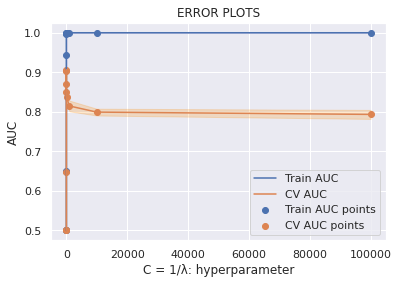

Best cross-validation score: 0.906
The best C from gridsearch : 0.1


In [ ]:
import warnings
L1_best_c=Grid_search(L1_model,X_train_bow,Y_train)

In [ ]:
#best alpha by grid search hyper parameter tuning
L1_best_c

0.1

In [ ]:
#function for testing test data
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

def test_data(model,x_train,y_train,x_test,y_test):
   
    model.fit(x_train, y_train)
    
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

    sns.set()
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.plot([0, 1], [0, 1], color='green', lw=1, linestyle='--')
    plt.legend()
    plt.xlabel("False_positive_rate")
    plt.ylabel("True positive_rate")    
    plt.title("ROC_Curve")
    plt.grid()
    plt.show()
    print('The AUC_score of test_data is :',auc(test_fpr, test_tpr))

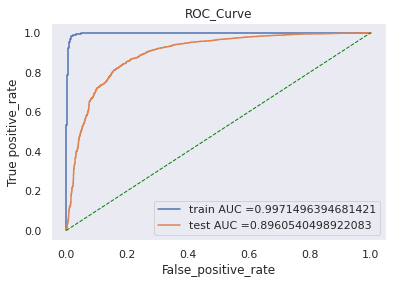

The AUC_score of test_data is : 0.8960540498922083


In [ ]:
L1_model=LogisticRegression(penalty='l1',C=L1_best_c,solver='liblinear',max_iter=500)
test_data(L1_model,X_train_bow,Y_train,X_test_bow,Y_test)

In [ ]:
#defining a function for computing the metric score
#Confusion matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def metric(model,x_train,y_train,x_test,y_test):
    
    model.fit(x_train, y_train)
    predict=model.predict(x_test)

    conf_mat = confusion_matrix(Y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    
    report=classification_report(y_test,predict)
    print(report)
    
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

              precision    recall  f1-score   support

           0       0.69      0.57      0.62      1360
           1       0.93      0.95      0.94      7640

    accuracy                           0.90      9000
   macro avg       0.81      0.76      0.78      9000
weighted avg       0.89      0.90      0.89      9000



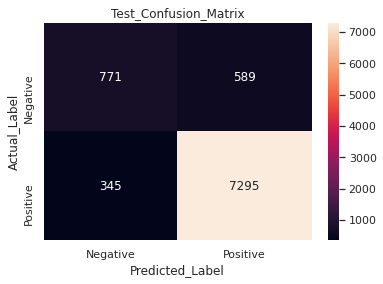

In [ ]:
L1_model=LogisticRegression(penalty='l1',C=L1_best_c,solver='liblinear',max_iter=500)
metric(L1_model,X_train_bow,Y_train,X_test_bow,Y_test)

Calculating sparsity on weight vector obtained using L1 regularization on BOW

In [ ]:
#lamda=1 
#c=1/lamda
model=LogisticRegression(penalty='l1',C=1,solver='liblinear',max_iter=500)
model.fit(X_train_bow,Y_train)
w = model.coef_
print(np.count_nonzero(w))

5513


In [ ]:
import warnings
#lamda=10
model=LogisticRegression(penalty='l1',C=10,solver='liblinear',max_iter=500)
model.fit(X_train_bow,Y_train)
w = model.coef_
print(np.count_nonzero(w))

5912


In [ ]:
#lamda=100
model=LogisticRegression(penalty='l1',C=100,solver='liblinear',max_iter=500)
model.fit(X_train_bow,Y_train)
w = model.coef_
print(np.count_nonzero(w))

6423


In [ ]:
#lamda=1000
model=LogisticRegression(penalty='l1',C=1000,solver='liblinear',max_iter=500)
model.fit(X_train_bow,Y_train)
w = model.coef_
print(np.count_nonzero(w))

9785



OBSERVATION :- From above we can see that the number of non-zero elements of W* is Increasing as we are increasing the value of C is Increasing, that means more sparsity by increasing C

Applying Logistic Regression with L2 regularization on BOW

In [ ]:
L2_model=LogisticRegression(penalty='l2',C=C, max_iter=500)
C = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]#alpha from 10^-5 to 10^5

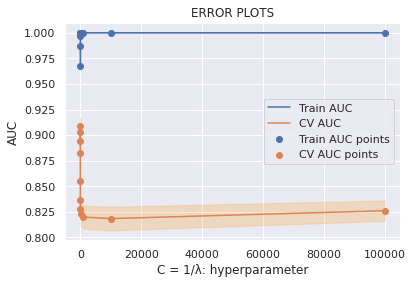

Best cross-validation score: 0.909
The best C from gridsearch : 0.0001


In [ ]:
#hyper parameter tuning using Grid search
L2_best_c=Grid_search(L2_model,X_train_bow,Y_train)

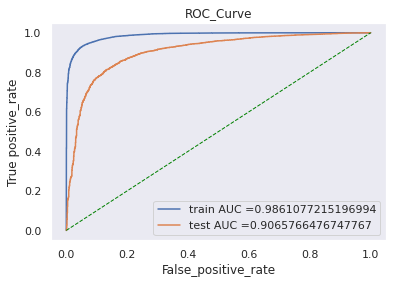

The AUC_score of test_data is : 0.9065766476747767


In [ ]:
#testing with test data
L2_model=LogisticRegression(penalty='l2',C=L2_best_c, max_iter=500)
test_data(L2_model,X_train_bow,Y_train,X_test_bow,Y_test)

              precision    recall  f1-score   support

           0       0.83      0.12      0.20      1360
           1       0.86      1.00      0.92      7640

    accuracy                           0.86      9000
   macro avg       0.85      0.56      0.56      9000
weighted avg       0.86      0.86      0.82      9000



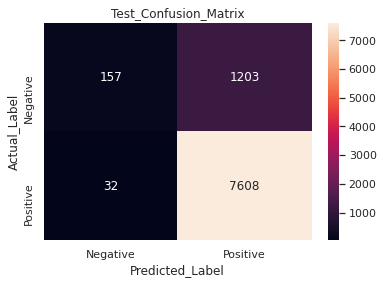

In [ ]:
#performance Metric
L2_model=LogisticRegression(penalty='l2',C=L2_best_c, max_iter=500)
metric(L2_model,X_train_bow,Y_train,X_test_bow,Y_test)

# Performing pertubation test (multicollinearity check) on BOW,

In [ ]:
#for checking multicollinearity we add e(small value) to train vector
W_before=L2_model.coef_

X_e=X_train_bow

X_e.data=X_e.data+np.random.normal(loc=0,scale=0.0001,size=X_e.data.shape)

X_e.shape

(21000, 21457)

In [ ]:
#Training Logistic regression with X_e

L2_model.fit(X_e,Y_train)
W_after=L2_model.coef_

#to eliminate divisible by zero error we will add 10^-6 to W_before and W_after
W_before+=10**-6
W_after+=10**-6

per_vector=[]

for i in range(len(W_before[0])):
    val=W_after[0][i]-W_before[0][i]
    val/=W_before[0][i]
    per_vector.append(val)
    
original_per_vect=np.absolute(per_vector)    
per_vector=sorted(np.absolute(per_vector))[::-1]

#percentage change in vectors

per_vector[:10]

[0.05027377083941775,
 0.01683099934856355,
 0.008237866003646037,
 0.004399363115923456,
 0.002966500900153116,
 0.001859547532457782,
 0.0017897617706139483,
 0.0015152718509381894,
 0.0014277073002790571,
 0.0013699993043093201]

In [ ]:
#calculating percentiles from 0 to 100

for i in range(11):
    print(str(i*10)+'th percentile = '+str(np.percentile(per_vector,i*10)))

0th percentile = 6.887173540434853e-11
10th percentile = 5.465495574735218e-07
20th percentile = 1.1152113488120365e-06
30th percentile = 1.7299728586399772e-06
40th percentile = 2.473692799913378e-06
50th percentile = 3.315584417740816e-06
60th percentile = 4.355766002772676e-06
70th percentile = 5.730772578311897e-06
80th percentile = 7.794151635476716e-06
90th percentile = 1.2272444303209348e-05
100th percentile = 0.05027377083941775


In [ ]:
#calculating percentile from 90 to 100
for i in range(90,101):
    print(str(i)+'th percentile ='+str(np.percentile(per_vector,i)))

90th percentile =1.2272444303209348e-05
91th percentile =1.2999680939196827e-05
92th percentile =1.404429829908973e-05
93th percentile =1.5171734532893862e-05
94th percentile =1.6708122097676523e-05
95th percentile =1.9135162468422656e-05
96th percentile =2.2160182279520875e-05
97th percentile =2.8019177491354083e-05
98th percentile =3.9700653208502895e-05
99th percentile =7.682483538780091e-05
100th percentile =0.05027377083941775


In [ ]:
#calculating percentile from 99.1 to 100
for i in range(1,11):
    print(str(99+(10**-1)*i)+'th percentile ='+str(np.percentile(per_vector,99+(10**-1)*i)))

99.1th percentile =8.347580851165066e-05
99.2th percentile =9.153285261099034e-05
99.3th percentile =0.00010384723793788406
99.4th percentile =0.00012199370648366379
99.5th percentile =0.0001427667031082377
99.6th percentile =0.00019314161752958305
99.7th percentile =0.00025526447559542903
99.8th percentile =0.0003811115414376295
99.9th percentile =0.0006290441962432123
100.0th percentile =0.05027377083941775


OBSERVATION :- From above we can see that there is no large change in the weights of the both vectors . So we will use absolute value of weights(|w|) of the feature to find important features

# Feature Importance on BOW

Top 10 important features of from with L2 Regularization

In [ ]:
# top 10 important positive features

weight=L2_model.coef_

all_features=Vect.get_feature_names()

pos_indx=np.argsort(weight)[:,::-1]


neg_indx=np.argsort(weight)

print('Top 10 positive features :')
for i in list(pos_indx[0][0:10]):
    print("%12s\t--> \t%f"%(all_features[i],weight[0,i]))

Top 10 positive features :
       great	--> 	0.059082
        love	--> 	0.057676
        best	--> 	0.044059
     perfect	--> 	0.032009
      delici	--> 	0.031870
       excel	--> 	0.030852
     favorit	--> 	0.025704
        nice	--> 	0.024115
        good	--> 	0.024083
       alway	--> 	0.023872


In [ ]:
print('Top 10 negative features :')
for i in list(neg_indx[0][:10]):
   print("%12s\t--> \t%f"%(all_features[i],weight[0,i]))

Top 10 negative features :
  disappoint	--> 	-0.079397
         not	--> 	-0.059678
       money	--> 	-0.051588
       threw	--> 	-0.045980
        wast	--> 	-0.044549
       worst	--> 	-0.040076
     terribl	--> 	-0.039616
          aw	--> 	-0.039360
      return	--> 	-0.037174
     thought	--> 	-0.033097


 Top 10 important features from with L1 regularization

In [ ]:
# top 10 important positive features

weight=L1_model.coef_
pos_indx=np.argsort(weight)[:,::-1]

neg_indx=np.argsort(weight)

print('Top 10 positive features :')
for i in list(pos_indx[0][0:10]):
    print("%12s\t--> \t%f"%(all_features[i],weight[0,i]))

Top 10 positive features :
        love	--> 	1.009509
       great	--> 	0.924450
        best	--> 	0.810560
     perfect	--> 	0.542373
       excel	--> 	0.521831
      delici	--> 	0.514971
        good	--> 	0.499340
     favorit	--> 	0.397173
        nice	--> 	0.364217
        find	--> 	0.341587


In [ ]:
print('Top 10 negative features :')
for i in list(neg_indx[0][:10]):
   print("%12s\t--> \t%f"%(all_features[i],weight[0,i]))

Top 10 negative features :
         not	--> 	-1.106733
  disappoint	--> 	-0.490818
       worst	--> 	-0.294606
     terribl	--> 	-0.270092
       threw	--> 	-0.263101
       money	--> 	-0.261501
     thought	--> 	-0.251598
        tast	--> 	-0.249542
          aw	--> 	-0.249478
    unfortun	--> 	-0.241675


# Featurization using TFIDF

In [ ]:
# difine the tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf=TfidfVectorizer(ngram_range=(1, 2),min_df=10)
Train_tf_idf=tf_idf.fit_transform(X_train)
Test_tf_idf=tf_idf.transform(X_test)
print(Train_tf_idf.shape,Y_train.shape)
print(Test_tf_idf.shape,Y_test.shape)

(21000, 12665) (21000,)
(9000, 12665) (9000,)


In [ ]:
# we should standardize the data before applying logistic regression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train_tfidf = sc.fit_transform(Train_tf_idf)
X_test_tfidf = sc.transform(Test_tf_idf)

Applying Logistic Regression with L1 regularization on tfidf features,

In [ ]:
C = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]#alpha from 10^-5 to 10^5
L1_model=LogisticRegression(penalty='l1',C=C,solver='liblinear',max_iter=500)

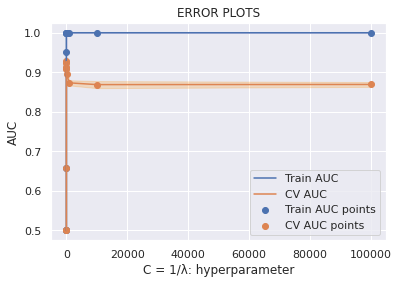

Best cross-validation score: 0.928
The best C from gridsearch : 0.01


In [ ]:
#gridsearch fro best_c
L1_best_c=Grid_search(L1_model,X_train_tfidf,Y_train)

In [ ]:
#best alpha by grid search hyper parameter tuning
L1_best_c

0.01

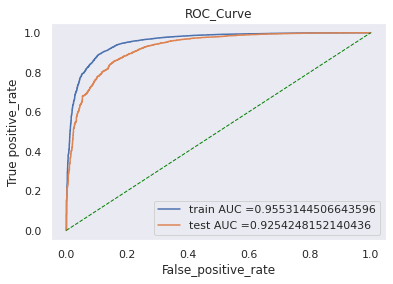

The AUC_score of test_data is : 0.9254248152140436


In [ ]:
#testing with the test data
L1_model=LogisticRegression(penalty='l1',C=L1_best_c,solver='liblinear',max_iter=500)
test_data(L1_model,X_train_tfidf,Y_train,X_test_tfidf,Y_test)

              precision    recall  f1-score   support

           0       0.84      0.46      0.60      1360
           1       0.91      0.98      0.95      7640

    accuracy                           0.91      9000
   macro avg       0.88      0.72      0.77      9000
weighted avg       0.90      0.91      0.89      9000



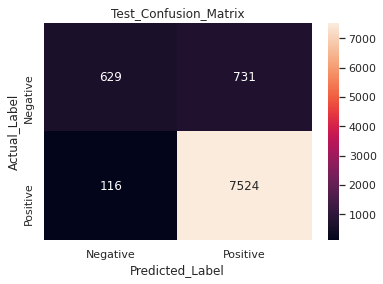

In [ ]:
#performance metric
L1_model=LogisticRegression(penalty='l1',C=L1_best_c,solver='liblinear',max_iter=500)
metric(L1_model,X_train_tfidf,Y_train,X_test_tfidf,Y_test)

Applying Logistic Regression with L2 regularization on tfidf features

In [ ]:
L2_model=LogisticRegression(penalty='l2',C=C, max_iter=500)
C = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]#alpha from 10^-5 to 10^5

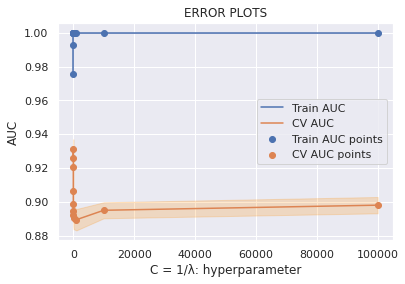

Best cross-validation score: 0.931
The best C from gridsearch : 0.0001


In [ ]:
#hyper parameter tuning using Grid search
L2_best_c=Grid_search(L2_model,X_train_tfidf,Y_train)

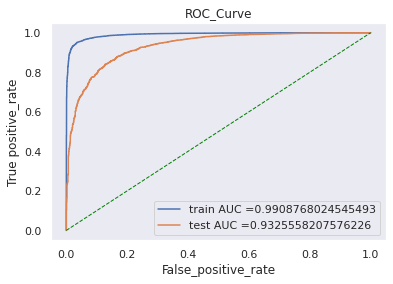

The AUC_score of test_data is : 0.9325558207576226


In [ ]:
#testing with test data
L2_model=LogisticRegression(penalty='l2',C=L2_best_c, max_iter=500)
test_data(L2_model,X_train_tfidf,Y_train,X_test_tfidf,Y_test)

              precision    recall  f1-score   support

           0       0.93      0.26      0.40      1360
           1       0.88      1.00      0.94      7640

    accuracy                           0.88      9000
   macro avg       0.90      0.63      0.67      9000
weighted avg       0.89      0.88      0.86      9000



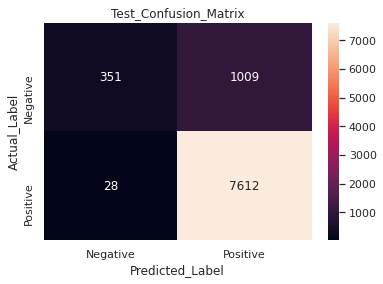

In [ ]:
#performance Metric
L2_model=LogisticRegression(penalty='l2',C=L2_best_c, max_iter=500)
metric(L2_model,X_train_tfidf,Y_train,X_test_tfidf,Y_test)

# Feature Importance on tfidf

Top 10 important features of from with L2 Regularization

In [ ]:
# top 10 important positive and Negative features

weight=L2_model.coef_
pos_indx=np.argsort(weight)[:,::-1]

neg_indx=np.argsort(weight)

print('Top 10 positive features :')
for i in list(pos_indx[0][0:10]):
    print("%12s\t--> \t%f"%(all_features[i],weight[0,i]))

print('***********************************************')

print('Top 10 negative features :')
for i in list(neg_indx[0][:10]):
   print("%12s\t--> \t%f"%(all_features[i],weight[0,i]))

Top 10 positive features :
       everi	--> 	0.048229
      deduct	--> 	0.046622
      anyoth	--> 	0.035786
   guiltless	--> 	0.027573
 butterfield	--> 	0.026945
       cylon	--> 	0.025800
       chomp	--> 	0.024036
  differernc	--> 	0.023970
   frankfurt	--> 	0.021873
     cococut	--> 	0.021791
***********************************************
Top 10 negative features :
    camellia	--> 	-0.068684
    freshner	--> 	-0.059340
     fritter	--> 	-0.046082
         gar	--> 	-0.039221
     mamouth	--> 	-0.038361
       nefew	--> 	-0.037919
       genit	--> 	-0.036591
   flavonoid	--> 	-0.035751
      mormon	--> 	-0.035484
         mac	--> 	-0.034765


 Top 10 important features from with L1 regularization

In [ ]:
# top 10 important positive features

weight=L1_model.coef_
pos_indx=np.argsort(weight)[:,::-1]

neg_indx=np.argsort(weight)

print('Top 10 positive features :')
for i in list(pos_indx[0][0:10]):
    print("%12s\t--> \t%f"%(all_features[i],weight[0,i]))

print('*********************************')

print('Top 10 negative features :')
for i in list(neg_indx[0][:10]):
   print("%12s\t--> \t%f"%(all_features[i],weight[0,i]))

Top 10 positive features :
      deduct	--> 	0.536669
       everi	--> 	0.509112
      anyoth	--> 	0.383942
       cylon	--> 	0.283670
 butterfield	--> 	0.255084
   guiltless	--> 	0.231301
       chomp	--> 	0.204184
    milkshak	--> 	0.155625
  differernc	--> 	0.146565
      clever	--> 	0.146555
*********************************
Top 10 negative features :
    camellia	--> 	-0.310574
    freshner	--> 	-0.190402
       genit	--> 	-0.145887
     fritter	--> 	-0.137926
       nefew	--> 	-0.132702
     mamouth	--> 	-0.131910
         gar	--> 	-0.120350
        fumi	--> 	-0.111256
    incompar	--> 	-0.105765
   flavonoid	--> 	-0.105299


# Featurization using Word2Vec

In [ ]:
# Train your own Word2Vec model using your own text corpus
i=0
train_list_of_sentance=[]
for sentance in X_train:
    train_list_of_sentance.append(sentance.split())

In [ ]:
# Train your own Word2Vec model using your own text corpus for test data
i=0
test_list_of_sentance=[]
for sentance in X_test:
    test_list_of_sentance.append(sentance.split())

In [ ]:
print(len(train_list_of_sentance))
print(len(test_list_of_sentance))

21000
9000


In [ ]:
# Using Google News Word2Vectors
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
# min_count = 5 considers only words that occured atleast 5 times
train_w2v_model=Word2Vec(train_list_of_sentance,min_count=5,size=50, workers=4)    

In [ ]:
train_w2v_words = list(train_w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(train_w2v_words))
print("sample words ", train_w2v_words[0:50])

number of words that occured minimum 5 times  7009
sample words  ['got', 'sauc', 'costco', 'jar', 'normal', 'price', 'seem', 'right', 'time', 'need', 'cook', 'supper', 'fast', 'not', 'start', 'scratch', 'carri', 'anymor', 'case', 'occas', 'complet', 'deplet', 'fret', 'consid', 'pasta', 'beneath', 'believ', 'italian', 'grandmoth', 'would', 'roll', 'use', 'store', 'bought', 'howev', 'pass', 'homemad', 'sometim', 'doctor', 'bit', 'necessari', 'famili', 'discern', 'palat', 'fool', 'number', 'tall', 'order', 'opinion', 'anyth']


In [ ]:
test_w2v_model=Word2Vec(test_list_of_sentance,min_count=5,size=50, workers=4)  
test_w2v_words = list(test_w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(test_w2v_words))
print("sample words ", test_w2v_words[0:50])

number of words that occured minimum 5 times  4678
sample words  ['heard', 'himalayan', 'pink', 'sea', 'salt', 'high', 'need', 'buy', 'decid', 'tri', 'alway', 'use', 'grinder', 'main', 'differ', 'regular', 'product', 'would', 'say', 'fine', 'ground', 'seem', 'ever', 'definit', 'care', 'not', 'lot', 'littl', 'goe', 'long', 'way', 'flavor', 'wise', 'also', 'even', 'though', 'still', 'work', 'perfect', 'overal', 'like', 'recommend', 'anyon', 'look', 'someth', 'new', 'add', 'food', 'rememb', 'soup']


# Converting text into vectors using Avg W2V

In [ ]:
# average Word2Vec
# compute average word2vec for each review.
train_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in train_list_of_sentance: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in train_w2v_words:
            vec = train_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    train_vectors.append(sent_vec)
train_vectors = np.array(train_vectors)
print(train_vectors.shape)
print(train_vectors[0])

(21000, 50)
[ 0.21520552  0.03609275  0.5938431   0.05908973 -0.54851756  0.04311007
  0.6430444  -0.3227736  -0.08465245  0.41423676 -0.63157276 -0.22762303
  0.00145898 -0.27038235 -0.1714588  -0.06327642  0.10606076  0.01769867
 -1.09580536 -0.79131803  0.1508243   0.04215063  0.12801097  0.63931749
  0.30924539 -0.35648728  0.5327505   0.41782763  0.24521673 -0.00655222
 -0.47035667  0.11557276 -0.21284975 -0.62273275 -0.01339865  0.50418528
 -0.33976038  0.43386068  0.1962596   0.14912612  0.30610684 -0.00651501
 -0.13062328 -0.07490648 -0.17459596  0.05876429 -0.45139848 -0.35088373
 -0.20265817  0.39781456]


In [ ]:
# average Word2Vec
# compute average word2vec for each review.
test_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in test_list_of_sentance: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in test_w2v_words:
            vec = test_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    test_vectors.append(sent_vec)
test_vectors = np.array(test_vectors)
print(test_vectors.shape)
print(test_vectors[0])

(9000, 50)
[ 0.19756027  0.17951162  0.47307667 -0.49312454 -0.36743488 -0.16285961
  0.0499487  -0.08111688 -0.16845585  0.49632728 -0.36699645  0.07502133
  0.42590744 -0.63349414 -0.475964    0.06312868  0.12079339 -0.32441644
 -0.94038422 -0.47090084 -0.39924557  0.11071955  0.84165784  0.54993399
  0.78080048 -0.52662426  0.35065727 -0.03432479  0.35850542  0.44704591
 -0.03149466  0.14111192 -0.09944082 -0.50905636  0.0375166   0.49958847
 -0.26839842 -0.01199866  0.37841732 -0.19810432  0.07856048  0.01780287
 -0.14867701 -0.24455396  0.0974538  -0.10806271 -0.72482509 -0.12573367
  0.05013297  0.55737591]


In [ ]:
avgw2v_train= np.array(train_vectors)
avgw2v_test= np.array(test_vectors)

Applying Logistic Regression with L1 regularization on Avgw2vec features,

In [ ]:
C = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]#alpha from 10^-5 to 10^5
L1_model=LogisticRegression(penalty='l1',C=C,solver='liblinear',max_iter=500)

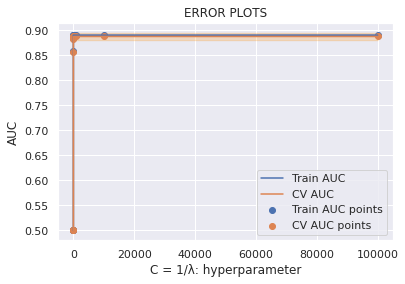

Best cross-validation score: 0.888
The best C from gridsearch : 10


In [ ]:
#gridsearch fro best_c
L1_best_c=Grid_search(L1_model,avgw2v_train,Y_train)

In [ ]:
#best alpha by grid search hyper parameter tuning
L1_best_c

10

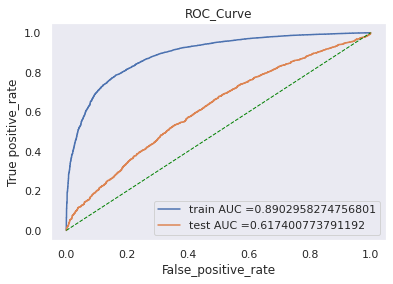

The AUC_score of test_data is : 0.617400773791192


In [ ]:
#testing with the test data
L1_model=LogisticRegression(penalty='l1',C=L1_best_c,solver='liblinear',max_iter=500)
test_data(L1_model,avgw2v_train,Y_train,avgw2v_test,Y_test)

              precision    recall  f1-score   support

           0       0.23      0.36      0.28      1360
           1       0.87      0.79      0.83      7640

    accuracy                           0.72      9000
   macro avg       0.55      0.57      0.55      9000
weighted avg       0.78      0.72      0.75      9000



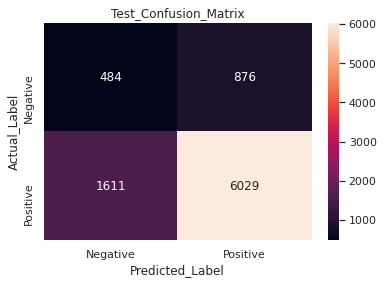

In [ ]:
#performance metric
L1_model=LogisticRegression(penalty='l1',C=L1_best_c,solver='liblinear',max_iter=500)
metric(L1_model,avgw2v_train,Y_train,avgw2v_test,Y_test)

Applying Logistic Regression with L2 regularization on Avgw2vec features

In [ ]:
L2_model=LogisticRegression(penalty='l2',C=C, max_iter=500)
C = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]#alpha from 10^-5 to 10^5

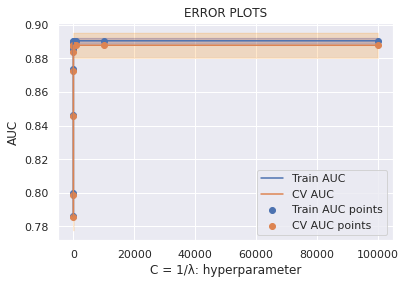

Best cross-validation score: 0.888
The best C from gridsearch : 10


In [ ]:
#hyper parameter tuning using Grid search
L2_best_c=Grid_search(L2_model,avgw2v_train,Y_train)

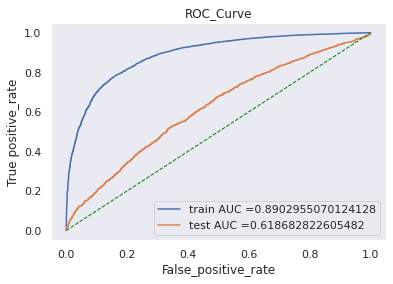

The AUC_score of test_data is : 0.618682822605482


In [ ]:
#testing with test data
L2_model=LogisticRegression(penalty='l2',C=L2_best_c, max_iter=500)
test_data(L2_model,avgw2v_train,Y_train,avgw2v_test,Y_test)

              precision    recall  f1-score   support

           0       0.23      0.33      0.27      1360
           1       0.87      0.80      0.84      7640

    accuracy                           0.73      9000
   macro avg       0.55      0.57      0.55      9000
weighted avg       0.77      0.73      0.75      9000



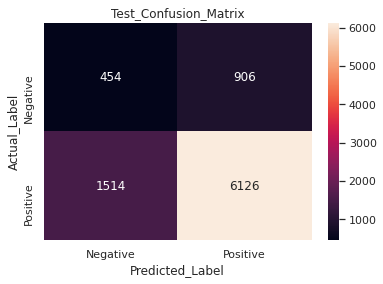

In [ ]:
#performance Metric
L2_model=LogisticRegression(penalty='l2',C=L2_best_c, max_iter=500)
metric(L2_model,avgw2v_train,Y_train,avgw2v_test,Y_test)

# Converting text into vectors using TFIDF W2V

In [ ]:
tfidf_vect = TfidfVectorizer()
train_tfidf_w2v = tfidf_vect.fit_transform(X_train)

In [ ]:
dictionary = dict(zip(tfidf_vect.get_feature_names(), list(tfidf_vect.idf_)))

In [ ]:
# tf_idf_w2v words of train data
tfidf_feat = tfidf_vect.get_feature_names()
train_tfidf_w2v_vectors = []
row = 0
for sent in train_list_of_sentance:
    sent_vec = np.zeros(50)
    weight_sum = 0
    for word in sent:
        if word in train_w2v_words and word in tfidf_feat:
            vec = train_w2v_model.wv[word]
             #tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    train_tfidf_w2v_vectors.append(sent_vec)
    row += 1

In [ ]:
# tf_idf_w2v words of test data
tfidf_feat = tfidf_vect.get_feature_names()
test_tfidf_w2v_vectors = []
row = 0
for sent in test_list_of_sentance:
    sent_vec = np.zeros(50)
    weight_sum = 0
    for word in sent:
        if word in test_w2v_words and word in tfidf_feat:
            vec = test_w2v_model.wv[word]
            #tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    test_tfidf_w2v_vectors.append(sent_vec)
    row += 1

In [ ]:
tfidf_avgw2v_train= np.array(train_tfidf_w2v_vectors)
tfidf_avgw2v_test= np.array(test_tfidf_w2v_vectors)

Applying Logistic Regression with L1 regularization on tfidfAvgw2vec features,

In [ ]:
C = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]#alpha from 10^-5 to 10^5
L1_model=LogisticRegression(penalty='l1',C=C,solver='liblinear',max_iter=500)

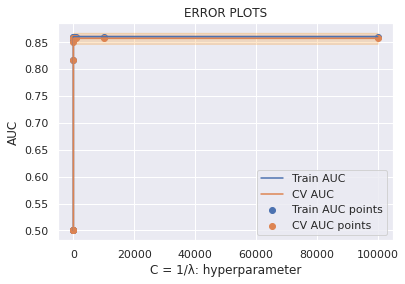

Best cross-validation score: 0.857
The best C from gridsearch : 1


In [ ]:
#gridsearch fro best_c
L1_best_c=Grid_search(L1_model,tfidf_avgw2v_train,Y_train)

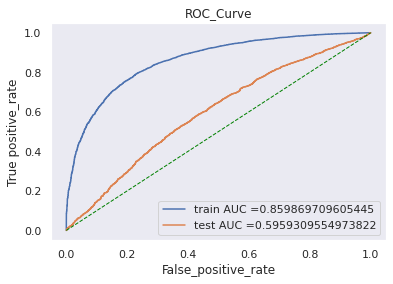

The AUC_score of test_data is : 0.5959309554973822


In [ ]:
#testing with the test data
L1_model=LogisticRegression(penalty='l1',C=L1_best_c,solver='liblinear',max_iter=500)
test_data(L1_model,tfidf_avgw2v_train,Y_train,tfidf_avgw2v_test,Y_test)

              precision    recall  f1-score   support

           0       0.22      0.36      0.27      1360
           1       0.87      0.78      0.82      7640

    accuracy                           0.71      9000
   macro avg       0.55      0.57      0.55      9000
weighted avg       0.77      0.71      0.74      9000



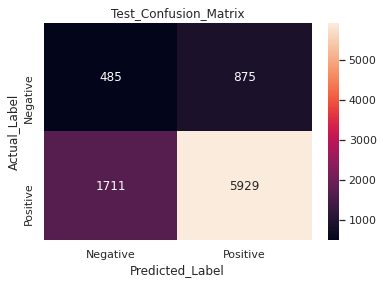

In [ ]:
#performance metric
L1_model=LogisticRegression(penalty='l1',C=L1_best_c,solver='liblinear',max_iter=500)
metric(L1_model,tfidf_avgw2v_train,Y_train,tfidf_avgw2v_test,Y_test)

Applying Logistic Regression with L2 regularization on tfidfAvgw2vec features

In [ ]:
L2_model=LogisticRegression(penalty='l2',C=C, max_iter=500)
C = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]#alpha from 10^-5 to 10^5

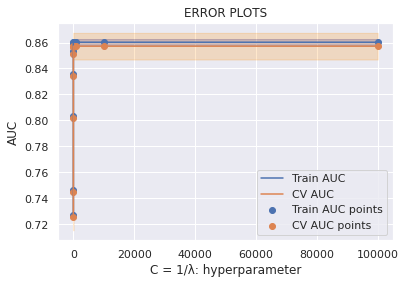

Best cross-validation score: 0.857
The best C from gridsearch : 10


In [ ]:
#hyper parameter tuning using Grid search
L2_best_c=Grid_search(L2_model,tfidf_avgw2v_train,Y_train)

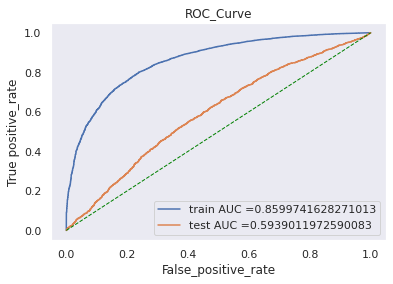

The AUC_score of test_data is : 0.5939011972590083


In [ ]:
#testing with test data
L2_model=LogisticRegression(penalty='l2',C=L2_best_c, max_iter=500)
test_data(L2_model,tfidf_avgw2v_train,Y_train,tfidf_avgw2v_test,Y_test)

              precision    recall  f1-score   support

           0       0.22      0.38      0.27      1360
           1       0.87      0.75      0.81      7640

    accuracy                           0.70      9000
   macro avg       0.54      0.57      0.54      9000
weighted avg       0.77      0.70      0.73      9000



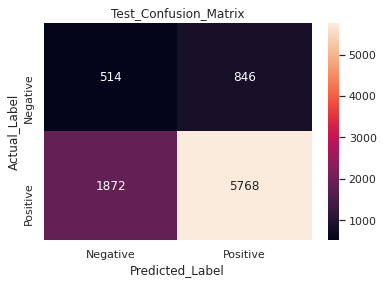

In [ ]:
#performance Metric
L2_model=LogisticRegression(penalty='l2',C=L2_best_c, max_iter=500)
metric(L2_model,tfidf_avgw2v_train,Y_train,tfidf_avgw2v_test,Y_test)

# Conclusion

In [ ]:
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names = ["Vectorizer","Regularization", "Hyperameter(C=1/lamda)", "AUC"]
x.add_row(["BOW","L1",0.1,89.60])
x.add_row(["BOW","L2",0.0001,90.65])
x.add_row(["TFIDF","L1",0.01,92.54])
x.add_row(["TFIDF","L2",0.0001,93.25])
x.add_row(["AvgW2v","L1",10,61.74])
x.add_row(["AvgW2v","L2",10,61.86])
x.add_row(["TFIDF_AvgW2v","L1",1,59.59])
x.add_row(["TFIDF_AvgW2v","L2",10,59.39])
print(x)

+--------------+----------------+------------------------+-------+
|  Vectorizer  | Regularization | Hyperameter(C=1/lamda) |  AUC  |
+--------------+----------------+------------------------+-------+
|     BOW      |       L1       |          0.1           |  89.6 |
|     BOW      |       L2       |         0.0001         | 90.65 |
|    TFIDF     |       L1       |          0.01          | 92.54 |
|    TFIDF     |       L2       |         0.0001         | 93.25 |
|    AvgW2v    |       L1       |           10           | 61.74 |
|    AvgW2v    |       L2       |           10           | 61.86 |
| TFIDF_AvgW2v |       L1       |           1            | 59.59 |
| TFIDF_AvgW2v |       L2       |           10           | 59.39 |
+--------------+----------------+------------------------+-------+


From the above table we conclude that TFIDF featurization with L2 Regularization have the Highest AUC score i.e 93.25 %